In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import os
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [2]:
SPRatings = pd.read_csv("SPRatings.csv")

In [3]:
SPRatings = SPRatings.drop(SPRatings.columns[0], axis=1)
SPRatings

,Global Company Key,S&P Domestic Long Term Issuer Credit Rating,Data Date,Company Name,Ticker Symbol,Shillers Cyclically Adjusted P/E Ratio,Book/Market,Enterprise Value Multiple,"Price/Operating Earnings (Basic, Excl. EI)","Price/Operating Earnings (Diluted, Excl. EI)",...,Receivables Turnover,Payables Turnover,Sales/Invested Capital,Sales/Stockholders Equity,Research and Development/Sales,Avertising Expenses/Sales,Labor Expenses/Sales,Accruals/Average Assets,Price/Book,Dividend Yield
0,1447,A+,20040229,AMERICAN EXPRESS CO,AXP,27.958,0.247,20.164,22.829,23.126,...,0.414,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.476,0.00749
1,1447,A+,20040331,AMERICAN EXPRESS CO,AXP,27.264,0.247,20.164,22.158,22.446,...,0.414,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.365,0.00771
2,1447,A+,20040430,AMERICAN EXPRESS CO,AXP,25.740,0.247,20.164,20.919,21.190,...,0.414,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.121,0.00817
3,1447,A+,20040531,AMERICAN EXPRESS CO,AXP,26.623,0.237,20.164,20.444,20.779,...,0.433,0.666,0.798,1.819,0.0,0.000,0.238,0.016,4.118,0.00789
4,1447,A+,20040630,AMERICAN EXPRESS CO,AXP,26.980,0.237,20.164,20.718,21.057,...,0.433,0.666,0.798,1.819,0.0,0.000,0.238,0.016,4.173,0.00779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,177376,BBB-,20161031,DISCOVER FINANCIAL SVCS,DFS,9.508,0.497,9.914,10.393,10.412,...,0.145,0.111,0.290,0.897,0.0,0.020,0.133,0.020,2.050,0.02130
5055,177376,BBB-,20161130,DISCOVER FINANCIAL SVCS,DFS,11.374,0.481,10.167,12.412,12.412,...,0.146,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.478,0.01770
5056,177376,BBB-,20161231,DISCOVER FINANCIAL SVCS,DFS,12.099,0.481,10.167,13.203,13.203,...,0.146,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.636,0.01660
5057,177376,BBB-,20170131,DISCOVER FINANCIAL SVCS,DFS,11.468,0.481,10.167,12.689,12.689,...,0.146,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.498,0.01730


<BarContainer object of 11 artists>

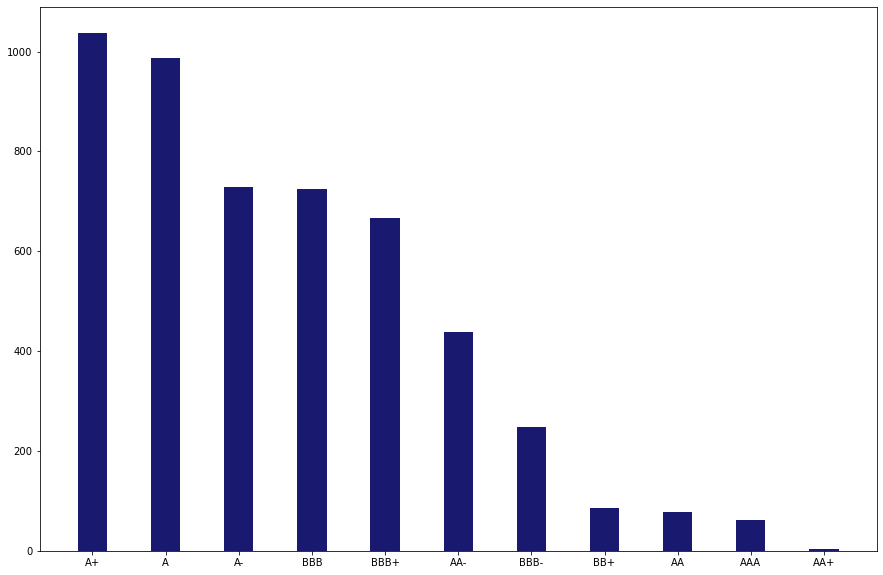

In [4]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

fggh = SPRatings['S&P Domestic Long Term Issuer Credit Rating'].value_counts().tolist()
fggg = SPRatings['S&P Domestic Long Term Issuer Credit Rating'].value_counts().index.tolist()

fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(fggg, fggh, color ='midnightblue',
        width = 0.4)

In [8]:
new_data = SPRatings[SPRatings['Company Name']=='FRANKLIN RESOURCES INC']
new_data

1. Data Cleaning
2. Feature Engineering
3. Correlation Matrix
4. top 20/25 parameters
5. Machine Learning Models using LazyPredict
6. Tablular Analysis of which model is best
7. Graphs along the way

1. Data Cleaning -

Convert Date column to desirable type - Done

Company Name remove or keep?

In [5]:
dummy = SPRatings.iloc[1,2]
dum_year = int(str(dummy)[:4])
dum_day = int(str(dummy)[4:6])
dum_month = int(str(dummy)[6:])
print("dum_year:", dum_year, "\ndum_day:", dum_day, "\ndum_month", dum_month)

dum_year: 2004 
dum_day: 3 
dum_month 31


In [6]:
import datetime
SPRatings['Year'] = SPRatings.iloc[:,2]
SPRatings['Month'] = SPRatings.iloc[:,2]
SPRatings['Day'] = SPRatings.iloc[:,2]
for i in range(len(SPRatings['Data Date'])):
    SPRatings['Year'][i] = int(str(SPRatings['Data Date'][i])[:4])
    SPRatings['Month'][i] = int(str(SPRatings['Data Date'][i])[4:6])
    SPRatings['Day'][i] = int(str(SPRatings['Data Date'][i])[6:])
cols=["Year","Month","Day"]

<ipython-input-6-adae457d68cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPRatings['Year'][i] = int(str(SPRatings['Data Date'][i])[:4])
<ipython-input-6-adae457d68cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPRatings['Month'][i] = int(str(SPRatings['Data Date'][i])[4:6])
<ipython-input-6-adae457d68cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPRatings['Day'][i] = int(str(SPRatings['Data Date'][i])[6:])


In [7]:
SPRatings['Data Date'] = SPRatings[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
SPRatings['Data Date'] = pd.to_datetime(SPRatings['Data Date'])

In [43]:
SPRatings = SPRatings.drop(['Year','Month','Day'], axis=1)

KeyError: "['Year' 'Month' 'Day'] not found in axis"

(25,)

In [9]:
uni = len(pd.unique(SPRatings['S&P Domestic Long Term Issuer Credit Rating']))
uni

11

# Feature Engineering

## Ordinal Encoding for Credit Rating

In [10]:
list123 = SPRatings['S&P Domestic Long Term Issuer Credit Rating']
list123 = np.unique(list123)
list123

array(['A', 'A+', 'A-', 'AA', 'AA+', 'AA-', 'AAA', 'BB+', 'BBB', 'BBB+',
       'BBB-'], dtype=object)

In [11]:
#import category_encoders as ce

# create object of Ordinalencoding
#encoder= ce.OrdinalEncoder(cols=['S&P Domestic Long Term Issuer Credit Rating'],return_df=True,
 #                          mapping=[{'col':'S&P Domestic Long Term Issuer Credit Rating',
#'mapping':{'A':0,'A+':1, 'A-':2, 'AA':3, 'AA+':4, 'AA-':5, 'AAA':6, 'BB+':7, 'BBB':8, 'BBB+':9,'BBB-':10}}])

#SPRatings = encoder.fit_transform(SPRatings)
SPRatings

,Global Company Key,S&P Domestic Long Term Issuer Credit Rating,Data Date,Company Name,Ticker Symbol,Shillers Cyclically Adjusted P/E Ratio,Book/Market,Enterprise Value Multiple,"Price/Operating Earnings (Basic, Excl. EI)","Price/Operating Earnings (Diluted, Excl. EI)",...,Receivables Turnover,Payables Turnover,Sales/Invested Capital,Sales/Stockholders Equity,Research and Development/Sales,Avertising Expenses/Sales,Labor Expenses/Sales,Accruals/Average Assets,Price/Book,Dividend Yield
0,1447,A+,2004-02-29,AMERICAN EXPRESS CO,AXP,27.958,0.247,20.164,22.829,23.126,...,0.414,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.476,0.00749
1,1447,A+,2004-03-31,AMERICAN EXPRESS CO,AXP,27.264,0.247,20.164,22.158,22.446,...,0.414,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.365,0.00771
2,1447,A+,2004-04-30,AMERICAN EXPRESS CO,AXP,25.740,0.247,20.164,20.919,21.190,...,0.414,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.121,0.00817
3,1447,A+,2004-05-31,AMERICAN EXPRESS CO,AXP,26.623,0.237,20.164,20.444,20.779,...,0.433,0.666,0.798,1.819,0.0,0.000,0.238,0.016,4.118,0.00789
4,1447,A+,2004-06-30,AMERICAN EXPRESS CO,AXP,26.980,0.237,20.164,20.718,21.057,...,0.433,0.666,0.798,1.819,0.0,0.000,0.238,0.016,4.173,0.00779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,177376,BBB-,2016-10-31,DISCOVER FINANCIAL SVCS,DFS,9.508,0.497,9.914,10.393,10.412,...,0.145,0.111,0.290,0.897,0.0,0.020,0.133,0.020,2.050,0.02130
5055,177376,BBB-,2016-11-30,DISCOVER FINANCIAL SVCS,DFS,11.374,0.481,10.167,12.412,12.412,...,0.146,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.478,0.01770
5056,177376,BBB-,2016-12-31,DISCOVER FINANCIAL SVCS,DFS,12.099,0.481,10.167,13.203,13.203,...,0.146,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.636,0.01660
5057,177376,BBB-,2017-01-31,DISCOVER FINANCIAL SVCS,DFS,11.468,0.481,10.167,12.689,12.689,...,0.146,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.498,0.01730


In [12]:
temp = SPRatings.iloc[1,1]
SPRatings.dtypes

Global Company Key                                        int64
S&P Domestic Long Term Issuer Credit Rating              object
Data Date                                        datetime64[ns]
Company Name                                             object
Ticker Symbol                                            object
Shillers Cyclically Adjusted P/E Ratio                  float64
Book/Market                                             float64
Enterprise Value Multiple                               float64
Price/Operating Earnings (Basic, Excl. EI)              float64
Price/Operating Earnings (Diluted, Excl. EI)            float64
P/E (Diluted, Excl. EI)                                 float64
P/E (Diluted, Incl. EI)                                 float64
Price/Sales                                             float64
Price/Cash flow                                         float64
Dividend Payout Ratio                                   float64
Net Profit Margin                       

In [27]:
scale_mapper = {'A':0,'A+':1, 'A-':2, 'AA':3, 'AA+':4, 'AA-':5, 'AAA':6, 'BB+':7, 'BBB':8, 'BBB+':9,'BBB-':10}
SPRatings['scale'] = SPRatings['S&P Domestic Long Term Issuer Credit Rating'].replace(scale_mapper)
SPRatings['S&P Domestic Long Term Issuer Credit Rating']=SPRatings['scale']
SPRatings

,Global Company Key,S&P Domestic Long Term Issuer Credit Rating,Data Date,Company Name,Ticker Symbol,Shillers Cyclically Adjusted P/E Ratio,Book/Market,Enterprise Value Multiple,"Price/Operating Earnings (Basic, Excl. EI)","Price/Operating Earnings (Diluted, Excl. EI)",...,Payables Turnover,Sales/Invested Capital,Sales/Stockholders Equity,Research and Development/Sales,Avertising Expenses/Sales,Labor Expenses/Sales,Accruals/Average Assets,Price/Book,Dividend Yield,scale
0,1447,1,2004-02-29,AMERICAN EXPRESS CO,AXP,27.958,0.247,20.164,22.829,23.126,...,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.476,0.00749,1
1,1447,1,2004-03-31,AMERICAN EXPRESS CO,AXP,27.264,0.247,20.164,22.158,22.446,...,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.365,0.00771,1
2,1447,1,2004-04-30,AMERICAN EXPRESS CO,AXP,25.740,0.247,20.164,20.919,21.190,...,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.121,0.00817,1
3,1447,1,2004-05-31,AMERICAN EXPRESS CO,AXP,26.623,0.237,20.164,20.444,20.779,...,0.666,0.798,1.819,0.0,0.000,0.238,0.016,4.118,0.00789,1
4,1447,1,2004-06-30,AMERICAN EXPRESS CO,AXP,26.980,0.237,20.164,20.718,21.057,...,0.666,0.798,1.819,0.0,0.000,0.238,0.016,4.173,0.00779,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,177376,10,2016-10-31,DISCOVER FINANCIAL SVCS,DFS,9.508,0.497,9.914,10.393,10.412,...,0.111,0.290,0.897,0.0,0.020,0.133,0.020,2.050,0.02130,10
5055,177376,10,2016-11-30,DISCOVER FINANCIAL SVCS,DFS,11.374,0.481,10.167,12.412,12.412,...,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.478,0.01770,10
5056,177376,10,2016-12-31,DISCOVER FINANCIAL SVCS,DFS,12.099,0.481,10.167,13.203,13.203,...,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.636,0.01660,10
5057,177376,10,2017-01-31,DISCOVER FINANCIAL SVCS,DFS,11.468,0.481,10.167,12.689,12.689,...,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.498,0.01730,10


# Correlation Matrix

<IPython.core.display.Javascript object>

<AxesSubplot:>

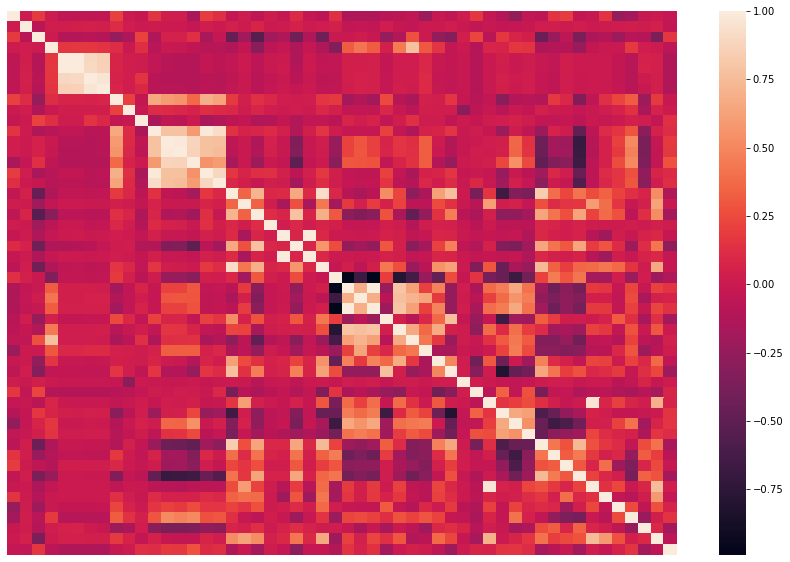

In [14]:
#Correlation Matrix
from matplotlib import pyplot as plt

f, ax = plt.subplots(1, 1, figsize = (15, 10))
corr = SPRatings.corr()

sns.heatmap(corr,yticklabels=False,xticklabels=False)

In [2]:
df1 = SPRatings["S&P Domestic Long Term Issuer Credit Rating"]
df2 = SPRatings.drop(['S&P Domestic Long Term Issuer Credit Rating'],axis=1)
df1

NameError: name 'SPRatings' is not defined

In [1]:
correlation_KP = df2.corrwith(df1,axis=0)
correlation_KP = correlation_KP.sort_values(ascending=False)
correlation_KP_df = correlation_KP.to_frame()
correlation_KP_df = correlation_KP_df.reset_index()
correlation_KP_df.columns = ['Independent Variables','Rating Correlation']
correlation_KP_df_pos = correlation_KP_df[correlation_KP_df['Rating Correlation']>0]
#not_needed = correlation_KP_df[correlation_KP_df['Rating Correlation']<0]
#not_needed
correlation_KP_df_pos

NameError: name 'df2' is not defined

In [16]:
correlation_kendall = df2.corrwith(df1,axis=0, method = 'spearman')
correlation_kendall.sort_values(ascending=False)

Total Debt/Total Assets                          0.191749
Long-term Debt/Total Liabilities                 0.180666
Long-term Debt/Invested Capital                  0.161595
Book/Market                                      0.161503
Long-term Debt/Book Equity                       0.156895
Capitalization Ratio                             0.155908
Total Debt/EBITDA                                0.135118
Total Debt/Invested Capital                      0.121004
Global Company Key                               0.106154
Effective Tax Rate                               0.093303
Research and Development/Sales                   0.093267
P/E (Diluted, Incl. EI)                          0.088784
Price/Operating Earnings (Diluted, Excl. EI)     0.074710
P/E (Diluted, Excl. EI)                          0.073978
Price/Operating Earnings (Basic, Excl. EI)       0.073295
Asset Turnover                                   0.067958
Labor Expenses/Sales                             0.066222
Dividend Yield

In [31]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=[go.Table(
    header=dict(values=['Independent Variables','Rating Correlation'],
                fill_color='white',
                align='center'),
    cells=dict(values=[correlation_KP_df['Independent Variables'],correlation_KP_df['Rating Correlation']],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [33]:
list_not_needed = not_needed["Independent Variables"].tolist()
list_not_needed
#SPRatings_cleaned = SPRatings.drop([list_not_needed],axis=1)

['After-tax Return on Total Stockholders Equity',
 'After-tax Return on Average Common Equity',
 'Cash Flow/Total Debt',
 'Total Debt/Total Assets.1',
 'Price/Cash flow',
 'Dividend Yield',
 'Total Debt/EBITDA',
 'Total Debt/Invested Capital',
 'Short-Term Debt/Total Debt',
 'Shillers Cyclically Adjusted P/E Ratio',
 'Cash Balance/Total Liabilities',
 'Avertising Expenses/Sales',
 'Return on Capital Employed',
 'Gross Profit Margin',
 'Effective Tax Rate',
 'Cash Flow Margin',
 'Operating Profit Margin Before Depreciation',
 'Pre-tax Profit Margin',
 'Net Profit Margin',
 'Common Equity/Invested Capital',
 'Enterprise Value Multiple',
 'Operating Profit Margin After Depreciation',
 'Total Debt/Equity',
 'Payables Turnover',
 'Price/Sales',
 'Receivables Turnover',
 'Total Liabilities/Total Tangible Assets']

In [34]:
cols_to_keep = correlation_KP_df_pos['Independent Variables']
ML_Ready_SPRating = pd.DataFrame()
for col in cols_to_keep:
    if col in SPRatings.columns:
        ML_Ready_SPRating[col] = SPRatings[col]
ML_Ready_SPRating = ML_Ready_SPRating.assign(Data_Date=SPRatings['Data Date'],Company_Name=SPRatings['Company Name'],Ticker_Symbol=SPRatings['Ticker Symbol'], Credit_Rating=SPRatings['S&P Domestic Long Term Issuer Credit Rating'])
ML_Ready_SPRating

,scale,Long-term Debt/Total Liabilities,Book/Market,Total Debt/Capital,Gross Profit/Total Assets,Global Company Key,Total Debt/Total Assets,Return on Assets,Long-term Debt/Invested Capital,Capitalization Ratio,...,"Price/Operating Earnings (Diluted, Excl. EI)",Free Cash Flow/Operating Cash Flow,"Price/Operating Earnings (Basic, Excl. EI)",After-tax Return on Invested Capital,Sales/Invested Capital,Accruals/Average Assets,Data_Date,Company_Name,Ticker_Symbol,Credit_Rating
0,1,0.108,0.247,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,23.126,0.598,22.829,0.140,0.817,-0.003,2004-02-29,AMERICAN EXPRESS CO,AXP,1
1,1,0.108,0.247,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,22.446,0.598,22.158,0.140,0.817,-0.003,2004-03-31,AMERICAN EXPRESS CO,AXP,1
2,1,0.108,0.247,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,21.190,0.598,20.919,0.140,0.817,-0.003,2004-04-30,AMERICAN EXPRESS CO,AXP,1
3,1,0.125,0.237,0.825,0.030,1447,0.219,0.031,0.561,0.561,...,20.779,0.827,20.444,0.000,0.798,0.016,2004-05-31,AMERICAN EXPRESS CO,AXP,1
4,1,0.125,0.237,0.825,0.030,1447,0.219,0.031,0.561,0.561,...,21.057,0.827,20.718,0.000,0.798,0.016,2004-06-30,AMERICAN EXPRESS CO,AXP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,10,0.313,0.497,0.864,0.054,177376,0.284,0.055,0.677,0.677,...,10.412,0.959,10.393,0.086,0.290,0.020,2016-10-31,DISCOVER FINANCIAL SVCS,DFS,10
5055,10,0.318,0.481,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,12.412,0.957,12.412,0.086,0.288,0.021,2016-11-30,DISCOVER FINANCIAL SVCS,DFS,10
5056,10,0.318,0.481,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,13.203,0.957,13.203,0.086,0.288,0.021,2016-12-31,DISCOVER FINANCIAL SVCS,DFS,10
5057,10,0.318,0.481,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,12.689,0.957,12.689,0.086,0.288,0.021,2017-01-31,DISCOVER FINANCIAL SVCS,DFS,10


In [35]:
ML_Ready_SPRating

,scale,Long-term Debt/Total Liabilities,Book/Market,Total Debt/Capital,Gross Profit/Total Assets,Global Company Key,Total Debt/Total Assets,Return on Assets,Long-term Debt/Invested Capital,Capitalization Ratio,...,"Price/Operating Earnings (Diluted, Excl. EI)",Free Cash Flow/Operating Cash Flow,"Price/Operating Earnings (Basic, Excl. EI)",After-tax Return on Invested Capital,Sales/Invested Capital,Accruals/Average Assets,Data_Date,Company_Name,Ticker_Symbol,Credit_Rating
0,1,0.108,0.247,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,23.126,0.598,22.829,0.140,0.817,-0.003,2004-02-29,AMERICAN EXPRESS CO,AXP,1
1,1,0.108,0.247,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,22.446,0.598,22.158,0.140,0.817,-0.003,2004-03-31,AMERICAN EXPRESS CO,AXP,1
2,1,0.108,0.247,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,21.190,0.598,20.919,0.140,0.817,-0.003,2004-04-30,AMERICAN EXPRESS CO,AXP,1
3,1,0.125,0.237,0.825,0.030,1447,0.219,0.031,0.561,0.561,...,20.779,0.827,20.444,0.000,0.798,0.016,2004-05-31,AMERICAN EXPRESS CO,AXP,1
4,1,0.125,0.237,0.825,0.030,1447,0.219,0.031,0.561,0.561,...,21.057,0.827,20.718,0.000,0.798,0.016,2004-06-30,AMERICAN EXPRESS CO,AXP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,10,0.313,0.497,0.864,0.054,177376,0.284,0.055,0.677,0.677,...,10.412,0.959,10.393,0.086,0.290,0.020,2016-10-31,DISCOVER FINANCIAL SVCS,DFS,10
5055,10,0.318,0.481,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,12.412,0.957,12.412,0.086,0.288,0.021,2016-11-30,DISCOVER FINANCIAL SVCS,DFS,10
5056,10,0.318,0.481,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,13.203,0.957,13.203,0.086,0.288,0.021,2016-12-31,DISCOVER FINANCIAL SVCS,DFS,10
5057,10,0.318,0.481,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,12.689,0.957,12.689,0.086,0.288,0.021,2017-01-31,DISCOVER FINANCIAL SVCS,DFS,10


In [36]:
distinct_comp = ML_Ready_SPRating.Company_Name.unique()
distinct_comp

array(['AMERICAN EXPRESS CO', 'AFLAC INC', 'AMERICAN INTERNATIONAL GROUP',
       'BANK OF NEW YORK MELLON CORP', 'BLOCK H & R INC',
       'JPMORGAN CHASE & CO', 'COMERICA INC', 'FIFTH THIRD BANCORP',
       'REGIONS FINANCIAL CORP', 'M & T BANK CORP', 'U S BANCORP',
       'FRANKLIN RESOURCES INC', 'HUNTINGTON BANCSHARES', 'LOEWS CORP',
       'MARSH & MCLENNAN COS', 'BANK OF AMERICA CORP',
       'NORTHERN TRUST CORP', 'WELLS FARGO & CO',
       'PNC FINANCIAL SVCS GROUP INC', 'RAYMOND JAMES FINANCIAL CORP',
       'KEYCORP', 'STATE STREET CORP', 'SUNTRUST BANKS INC',
       'TORCHMARK CORP', 'BB&T CORP', 'MORGAN STANLEY', 'UNUM GROUP',
       'PROGRESSIVE CORP-OHIO', 'SCHWAB (CHARLES) CORP',
       "PEOPLE'S UNITED FINL INC", 'CITIZENS FINANCIAL GROUP INC',
       'ALLSTATE CORP', 'CAPITAL ONE FINANCIAL CORP',
       'HARTFORD FINANCIAL SERVICES', 'AFFILIATED MANAGERS GRP INC',
       'GOLDMAN SACHS GROUP INC', 'BLACKROCK INC', 'METLIFE INC',
       "MOODY'S CORP", 'CME GROUP INC',

In [37]:
asd = distinct_comp[1]
if ML_Ready_SPRating['Company_Name'] == asd:
    X = ML_Ready_SPRating.drop(["S&P Domestic Long Term Issuer Credit Rating"],axis=1)
    y = ML_Ready_SPRating["S&P Domestic Long Term Issuer Credit Rating"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_test.shape

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [38]:
X = SPRatings_dummy.drop(["S&P Domestic Long Term Issuer Credit Rating"],axis=1)
y = SPRatings_dummy["S&P Domestic Long Term Issuer Credit Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_test.shape

NameError: name 'SPRatings_dummy' is not defined

In [39]:
ML_Ready_SPRating = ML_Ready_SPRating[ML_Ready_SPRating['Company_Name'] != 'AFFILIATED MANAGERS GRP INC']
ML_Ready_SPRating

,scale,Long-term Debt/Total Liabilities,Book/Market,Total Debt/Capital,Gross Profit/Total Assets,Global Company Key,Total Debt/Total Assets,Return on Assets,Long-term Debt/Invested Capital,Capitalization Ratio,...,"Price/Operating Earnings (Diluted, Excl. EI)",Free Cash Flow/Operating Cash Flow,"Price/Operating Earnings (Basic, Excl. EI)",After-tax Return on Invested Capital,Sales/Invested Capital,Accruals/Average Assets,Data_Date,Company_Name,Ticker_Symbol,Credit_Rating
0,1,0.108,0.247,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,23.126,0.598,22.829,0.140,0.817,-0.003,2004-02-29,AMERICAN EXPRESS CO,AXP,1
1,1,0.108,0.247,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,22.446,0.598,22.158,0.140,0.817,-0.003,2004-03-31,AMERICAN EXPRESS CO,AXP,1
2,1,0.108,0.247,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,21.190,0.598,20.919,0.140,0.817,-0.003,2004-04-30,AMERICAN EXPRESS CO,AXP,1
3,1,0.125,0.237,0.825,0.030,1447,0.219,0.031,0.561,0.561,...,20.779,0.827,20.444,0.000,0.798,0.016,2004-05-31,AMERICAN EXPRESS CO,AXP,1
4,1,0.125,0.237,0.825,0.030,1447,0.219,0.031,0.561,0.561,...,21.057,0.827,20.718,0.000,0.798,0.016,2004-06-30,AMERICAN EXPRESS CO,AXP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,10,0.313,0.497,0.864,0.054,177376,0.284,0.055,0.677,0.677,...,10.412,0.959,10.393,0.086,0.290,0.020,2016-10-31,DISCOVER FINANCIAL SVCS,DFS,10
5055,10,0.318,0.481,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,12.412,0.957,12.412,0.086,0.288,0.021,2016-11-30,DISCOVER FINANCIAL SVCS,DFS,10
5056,10,0.318,0.481,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,13.203,0.957,13.203,0.086,0.288,0.021,2016-12-31,DISCOVER FINANCIAL SVCS,DFS,10
5057,10,0.318,0.481,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,12.689,0.957,12.689,0.086,0.288,0.021,2017-01-31,DISCOVER FINANCIAL SVCS,DFS,10


In [268]:
for comp in distinct_comp:
    dum_set = ML_Ready_SPRating[ML_Ready_SPRating['Company_Name']==comp]
    X = dum_set
    y = dum_set["Credit_Rating"]
    #X_train_dum, X_test_dum, y_train_dum, y_test_dum = train_test_split(X, y, test_size=0.3,train_size=0.7, random_state=42)
    #X_train.append(X_train_dum)
    #y_train.append(y_train_dum)
    #X_test.append(X_test_dum)
    #y_test.append(y_test_dum)


4977    10
4978    10
4979    10
4980    10
4981    10
        ..
5054    10
5055    10
5056    10
5057    10
5058    10
Name: Credit_Rating, Length: 82, dtype: int64

In [269]:
ML_Ready_SPRating.to_csv('qwer.csv')

In [274]:
X = ML_Ready_SPRating.drop(['Credit_Rating'],axis=1)
X = ML_Ready_SPRating.drop(['Data_Date'],axis=1)
y = ML_Ready_SPRating.Credit_Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Machine Learning to classify and test

In [275]:
#First Algo - Novel Approach - Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(x_test)

ValueError: could not convert string to float: 'KEY'

In [277]:
#!pip install lazypredict 
from lazypredict.Supervised import LazyClassifier

C:\Users\Alpesh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



In [278]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:17<00:00,  1.69it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     1.00               1.00    None      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
GaussianNB                         1.00               1.00    None      1.00   
LinearDiscriminantAnalysis         1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
LabelPropagation                   0.99               0.99    None      0.99   
LabelSpreading                     0.99 